In [ ]:
pip install feature-engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 276 kB 24.9 MB/s 


In [ ]:
import pandas as pd
import numpy as np
import seaborn as seaborn
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data=pd.read_csv("/content/drive/MyDrive/data01.csv")

Mounted at /content/drive


In [ ]:
data.groupby('outcome').size()  

outcome
0.0    1017
1.0     159
dtype: int64

In [ ]:
data.head()

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,1,125047,0.0,72,1,37.588179,0,0,0,1,...,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55
1,1,139812,0.0,75,2,NaN,0,0,0,0,...,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55
2,1,109787,0.0,83,2,26.572634,0,0,0,0,...,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35
3,1,130587,0.0,43,2,83.264629,0,0,0,0,...,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55
4,1,138290,0.0,75,2,31.824842,1,0,0,0,...,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   group                     1177 non-null   int64  
 1   ID                        1177 non-null   int64  
 2   outcome                   1176 non-null   float64
 3   age                       1177 non-null   int64  
 4   gendera                   1177 non-null   int64  
 5   BMI                       962 non-null    float64
 6   hypertensive              1177 non-null   int64  
 7   atrialfibrillation        1177 non-null   int64  
 8   CHD with no MI            1177 non-null   int64  
 9   diabetes                  1177 non-null   int64  
 10  deficiencyanemias         1177 non-null   int64  
 11  depression                1177 non-null   int64  
 12  Hyperlipemia              1177 non-null   int64  
 13  Renal failure             1177 non-null   int64  
 14  COPD    

In [ ]:
data.isnull().sum()

group                         0
ID                            0
outcome                       1
age                           0
gendera                       0
BMI                         215
hypertensive                  0
atrialfibrillation            0
CHD with no MI                0
diabetes                      0
deficiencyanemias             0
depression                    0
Hyperlipemia                  0
Renal failure                 0
COPD                          0
heart rate                   13
Systolic blood pressure      16
Diastolic blood pressure     16
Respiratory rate             13
temperature                  19
SP O2                        13
Urine output                 36
hematocrit                    0
RBC                           0
MCH                           0
MCHC                          0
MCV                           0
RDW                           0
Leucocyte                     0
Platelets                     0
Neutrophils                 144
Basophil

In [ ]:
data.describe(include="all")

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
count,1177.000000,1177.000000,1176.000000,1177.000000,1177.000000,962.000000,1177.000000,1177.000000,1177.000000,1177.000000,...,1177.000000,1176.000000,1177.000000,1177.000000,1177.000000,885.000000,1177.000000,948.000000,883.000000,1177.000000
mean,1.299065,150778.120646,0.135204,74.055225,1.525064,30.188278,0.717927,0.451147,0.085811,0.421410,...,138.890016,8.500894,102.283835,13.925094,2.120169,7.378532,26.911766,1.853426,45.535382,48.715378
std,0.458043,29034.669513,0.342087,13.434061,0.499584,9.325997,0.450200,0.497819,0.280204,0.493995,...,4.151347,0.572263,5.339733,2.652732,0.251532,0.067320,5.167512,0.983819,12.711271,12.868436
min,1.000000,100213.000000,0.000000,19.000000,1.000000,13.346801,0.000000,0.000000,0.000000,0.000000,...,114.666667,6.700000,80.266667,6.636364,1.400000,7.090000,12.857143,0.500000,18.750000,15.000000
25%,1.000000,125603.000000,0.000000,65.000000,1.000000,24.326461,0.000000,0.000000,0.000000,0.000000,...,136.666667,8.148864,99.000000,12.250000,1.955556,7.334615,23.454545,1.200000,37.038462,40.000000
50%,1.000000,151901.000000,0.000000,77.000000,2.000000,28.312474,1.000000,0.000000,0.000000,0.000000,...,139.250000,8.500000,102.500000,13.666667,2.092308,7.380000,26.500000,1.600000,43.000000,55.000000
75%,2.000000,176048.000000,0.000000,85.000000,2.000000,33.633509,1.000000,1.000000,0.000000,1.000000,...,141.600000,8.869063,105.571429,15.416667,2.241667,7.430000,29.875000,2.200000,50.585784,55.000000
max,2.000000,199952.000000,1.000000,99.000000,2.000000,104.970366,1.000000,1.000000,1.000000,1.000000,...,154.736842,10.950000,122.526316,25.500000,4.072727,7.580000,47.666667,8.333333,98.600000,75.000000


In [ ]:
data.tail()

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
1172,2,171130,0.0,62,1,25.516870,1,1,0,1,...,136.714286,10.271429,94.428571,20.142857,2.714286,NaN,27.714286,NaN,NaN,40
1173,2,101659,0.0,78,1,25.822710,0,1,0,1,...,135.680000,10.523529,101.720000,18.160000,2.012500,NaN,20.480000,NaN,NaN,30
1174,2,162069,0.0,85,2,23.891779,1,1,0,1,...,136.000000,8.466667,97.285714,14.000000,2.028571,NaN,28.857143,NaN,NaN,55
1175,2,120967,0.0,79,2,35.288554,0,0,1,1,...,140.000000,8.183333,104.000000,15.750000,2.090000,NaN,24.375000,NaN,NaN,25
1176,2,107636,0.0,47,1,23.121384,1,0,0,1,...,135.285714,9.085714,93.857143,20.285714,2.566667,NaN,26.571429,NaN,NaN,55


In [ ]:
data.shape

(1177, 51)

In [ ]:
data=data.dropna(thresh=45)
data.shape

(1149, 51)

In [ ]:
data["outcome"].value_counts()

0.0    991
1.0    158
Name: outcome, dtype: int64

In [ ]:
nulldata=data[data.isnull().any(axis=1)]
nulldata

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
1,1,139812,0.0,75,2,NaN,0,0,0,0,...,138.888889,8.162500,98.444444,11.444444,1.887500,7.225000,33.444444,0.50,78.000000,55
4,1,138290,0.0,75,2,31.824842,1,0,0,0,...,136.666667,8.733333,104.500000,15.166667,1.650000,7.250000,22.000000,0.60,50.000000,55
7,1,153461,0.0,83,2,22.311111,1,1,0,1,...,140.000000,9.171429,104.250000,12.571429,2.187500,7.550000,27.571429,0.65,31.333333,75
9,1,147252,0.0,67,1,45.032030,1,0,0,1,...,142.300000,8.150000,97.600000,12.000000,2.200000,7.360000,36.700000,0.70,67.000000,55
10,1,104216,0.0,70,2,50.461212,1,0,0,1,...,140.272727,8.450000,108.400000,13.600000,1.763636,7.248889,22.800000,0.70,48.111111,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1172,2,171130,0.0,62,1,25.516870,1,1,0,1,...,136.714286,10.271429,94.428571,20.142857,2.714286,NaN,27.714286,NaN,NaN,40
1173,2,101659,0.0,78,1,25.822710,0,1,0,1,...,135.680000,10.523529,101.720000,18.160000,2.012500,NaN,20.480000,NaN,NaN,30
1174,2,162069,0.0,85,2,23.891779,1,1,0,1,...,136.000000,8.466667,97.285714,14.000000,2.028571,NaN,28.857143,NaN,NaN,55
1175,2,120967,0.0,79,2,35.288554,0,0,1,1,...,140.000000,8.183333,104.000000,15.750000,2.090000,NaN,24.375000,NaN,NaN,25


In [ ]:
clean_data=data

In [ ]:
del_row=data[data.outcome.isnull()]
del_row

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF


In [ ]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1149 entries, 0 to 1176
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   group                     1149 non-null   int64  
 1   ID                        1149 non-null   int64  
 2   outcome                   1149 non-null   float64
 3   age                       1149 non-null   int64  
 4   gendera                   1149 non-null   int64  
 5   BMI                       946 non-null    float64
 6   hypertensive              1149 non-null   int64  
 7   atrialfibrillation        1149 non-null   int64  
 8   CHD with no MI            1149 non-null   int64  
 9   diabetes                  1149 non-null   int64  
 10  deficiencyanemias         1149 non-null   int64  
 11  depression                1149 non-null   int64  
 12  Hyperlipemia              1149 non-null   int64  
 13  Renal failure             1149 non-null   int64  
 14  COPD    

**IMPUTING MISSING VALUES USING SIMPLE IMPUTER BY MEAN METHOD**

In [ ]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values=np.nan, strategy='mean')

In [ ]:
col=clean_data.select_dtypes(include='float64', exclude='int64').columns
col

Index(['outcome', 'BMI', 'heart rate', 'Systolic blood pressure',
       'Diastolic blood pressure', 'Respiratory rate', 'temperature', 'SP O2',
       'Urine output', 'hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW',
       'Leucocyte', 'Platelets', 'Neutrophils', 'Basophils', 'Lymphocyte',
       'PT', 'INR', 'NT-proBNP', 'Creatine kinase', 'Creatinine',
       'Urea nitrogen', 'glucose', 'Blood potassium', 'Blood sodium',
       'Blood calcium', 'Chloride', 'Anion gap', 'Magnesium ion', 'PH',
       'Bicarbonate', 'Lactic acid', 'PCO2'],
      dtype='object')

In [ ]:
data

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,1,125047,0.0,72,1,37.588179,0,0,0,1,...,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55
1,1,139812,0.0,75,2,NaN,0,0,0,0,...,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55
2,1,109787,0.0,83,2,26.572634,0,0,0,0,...,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35
3,1,130587,0.0,43,2,83.264629,0,0,0,0,...,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55
4,1,138290,0.0,75,2,31.824842,1,0,0,0,...,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1172,2,171130,0.0,62,1,25.516870,1,1,0,1,...,136.714286,10.271429,94.428571,20.142857,2.714286,NaN,27.714286,NaN,NaN,40
1173,2,101659,0.0,78,1,25.822710,0,1,0,1,...,135.680000,10.523529,101.720000,18.160000,2.012500,NaN,20.480000,NaN,NaN,30
1174,2,162069,0.0,85,2,23.891779,1,1,0,1,...,136.000000,8.466667,97.285714,14.000000,2.028571,NaN,28.857143,NaN,NaN,55
1175,2,120967,0.0,79,2,35.288554,0,0,1,1,...,140.000000,8.183333,104.000000,15.750000,2.090000,NaN,24.375000,NaN,NaN,25


In [ ]:
new_data=data.groupby('outcome').mean()
new_data
data.fillna(new_data)

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,1,125047,0.0,72,1,37.588179,0,0,0,1,...,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55
1,1,139812,0.0,75,2,28.656515,0,0,0,0,...,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55
2,1,109787,0.0,83,2,26.572634,0,0,0,0,...,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35
3,1,130587,0.0,43,2,83.264629,0,0,0,0,...,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55
4,1,138290,0.0,75,2,31.824842,1,0,0,0,...,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1172,2,171130,0.0,62,1,25.516870,1,1,0,1,...,136.714286,10.271429,94.428571,20.142857,2.714286,NaN,27.714286,NaN,NaN,40
1173,2,101659,0.0,78,1,25.822710,0,1,0,1,...,135.680000,10.523529,101.720000,18.160000,2.012500,NaN,20.480000,NaN,NaN,30
1174,2,162069,0.0,85,2,23.891779,1,1,0,1,...,136.000000,8.466667,97.285714,14.000000,2.028571,NaN,28.857143,NaN,NaN,55
1175,2,120967,0.0,79,2,35.288554,0,0,1,1,...,140.000000,8.183333,104.000000,15.750000,2.090000,NaN,24.375000,NaN,NaN,25


In [ ]:
si.fit(clean_data[col])

SimpleImputer()

In [ ]:
clean_data[col]=si.transform(clean_data[col])

In [ ]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1149 entries, 0 to 1176
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   group                     1149 non-null   int64  
 1   ID                        1149 non-null   int64  
 2   outcome                   1149 non-null   float64
 3   age                       1149 non-null   int64  
 4   gendera                   1149 non-null   int64  
 5   BMI                       1149 non-null   float64
 6   hypertensive              1149 non-null   int64  
 7   atrialfibrillation        1149 non-null   int64  
 8   CHD with no MI            1149 non-null   int64  
 9   diabetes                  1149 non-null   int64  
 10  deficiencyanemias         1149 non-null   int64  
 11  depression                1149 non-null   int64  
 12  Hyperlipemia              1149 non-null   int64  
 13  Renal failure             1149 non-null   int64  
 14  COPD    

In [ ]:
clean_data['outcome'].value_counts() #Checking for imbalanced data.

0.0    991
1.0    158
Name: outcome, dtype: int64

**Dealing with imbalanced data**

In [ ]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(sampling_strategy='minority', random_state=10)
oversampled_X, oversampled_Y = sm.fit_resample(clean_data.drop('outcome', axis=1), clean_data['outcome'])
clean_data = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)

In [ ]:
clean_data['outcome'].value_counts()

0.0    991
1.0    991
Name: outcome, dtype: int64

**Data Visualization**

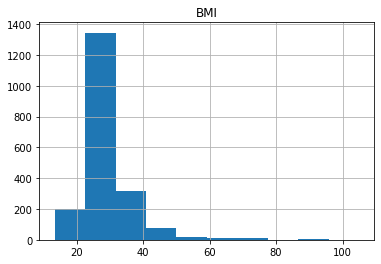

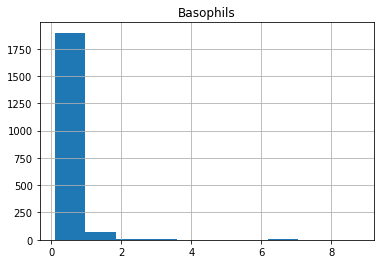

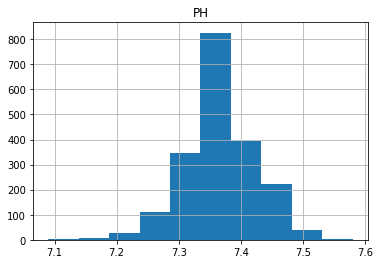

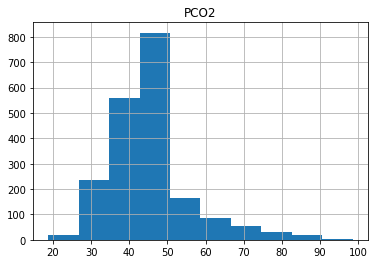

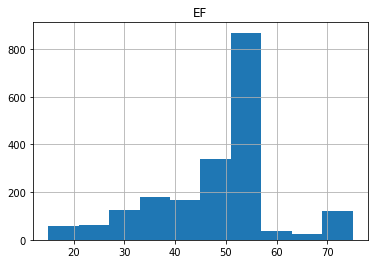

In [ ]:
from matplotlib import pyplot
clean_data.hist('BMI')
clean_data.hist('Basophils')
clean_data.hist('PH')
clean_data.hist('PCO2')
clean_data.hist('EF')
pyplot.show()

**Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split # Import train_test_split function

In [ ]:
#split dataset in features and target variable
X = clean_data.drop('outcome', axis=1)#features
Y = clean_data.outcome # Target variable

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1) # 80% training and 20% test

In [ ]:
X_train.shape

(1585, 50)

**Dropping Unnecessary features**

In [ ]:
from feature_engine.selection import  SmartCorrelatedSelection

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=10, random_state=20)

In [ ]:
scs=SmartCorrelatedSelection(selection_method="model_performance", estimator=rf, scoring="roc_auc", cv=3)

In [ ]:
scs.fit(X_train, Y_train)

SmartCorrelatedSelection(estimator=RandomForestClassifier(n_estimators=10,
                                                          random_state=20),
                         selection_method='model_performance')

In [ ]:
X_train=scs.transform(X_train)
X_test=scs.transform(X_test)

In [ ]:
X_train.shape

(1585, 46)

In [ ]:
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel

In [ ]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
scalar.fit(X_train)

StandardScaler()

In [ ]:
sel=SelectFromModel(LogisticRegression(C=0.8, penalty='l1', solver='liblinear', random_state=10))

In [ ]:
sel.fit_transform(scalar.transform(X_train), Y_train)

array([[-0.49506599,  1.5148616 , -0.0493701 , ..., -0.2811725 ,
        -0.28772058,  0.51797767],
       [-0.49506599,  1.32224295,  0.67147373, ..., -1.07227682,
         0.82795975, -0.78570571],
       [-0.49506599, -0.69818357,  0.67147373, ...,  0.04528983,
        -0.62556281, -2.25234951],
       ...,
       [-0.49506599,  0.46871647, -1.41096399, ...,  3.98991582,
        -0.32124985,  0.51797767],
       [-0.49506599,  0.43227605,  1.15203628, ..., -0.68794316,
        -1.34553408,  0.51797767],
       [ 2.01993272,  0.02631086,  1.07194252, ...,  1.24001244,
        -0.32196704,  0.51797767]])

In [ ]:
sel.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [ ]:
selected_feature = X_train.columns[sel.get_support()]
len(selected_feature)
selected_feature

Index(['group', 'ID', 'age', 'gendera', 'BMI', 'hypertensive',
       'atrialfibrillation', 'CHD with no MI', 'diabetes', 'deficiencyanemias',
       'depression', 'Hyperlipemia', 'Renal failure', 'COPD', 'heart rate',
       'Systolic blood pressure', 'Diastolic blood pressure',
       'Respiratory rate', 'temperature', 'SP O2', 'Urine output',
       'hematocrit', 'MCHC', 'MCV', 'RDW', 'Leucocyte', 'Platelets',
       'Basophils', 'Lymphocyte', 'INR', 'NT-proBNP', 'Creatine kinase',
       'Creatinine', 'Urea nitrogen', 'glucose', 'Blood calcium', 'Chloride',
       'Anion gap', 'Magnesium ion', 'PH', 'Bicarbonate', 'Lactic acid',
       'PCO2', 'EF'],
      dtype='object')

**Decision Tree**

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,Y_train)

#Predict the response for test dataset
clf_pred = clf.predict(X_test)

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, clf_pred))

Accuracy: 0.8740554156171285


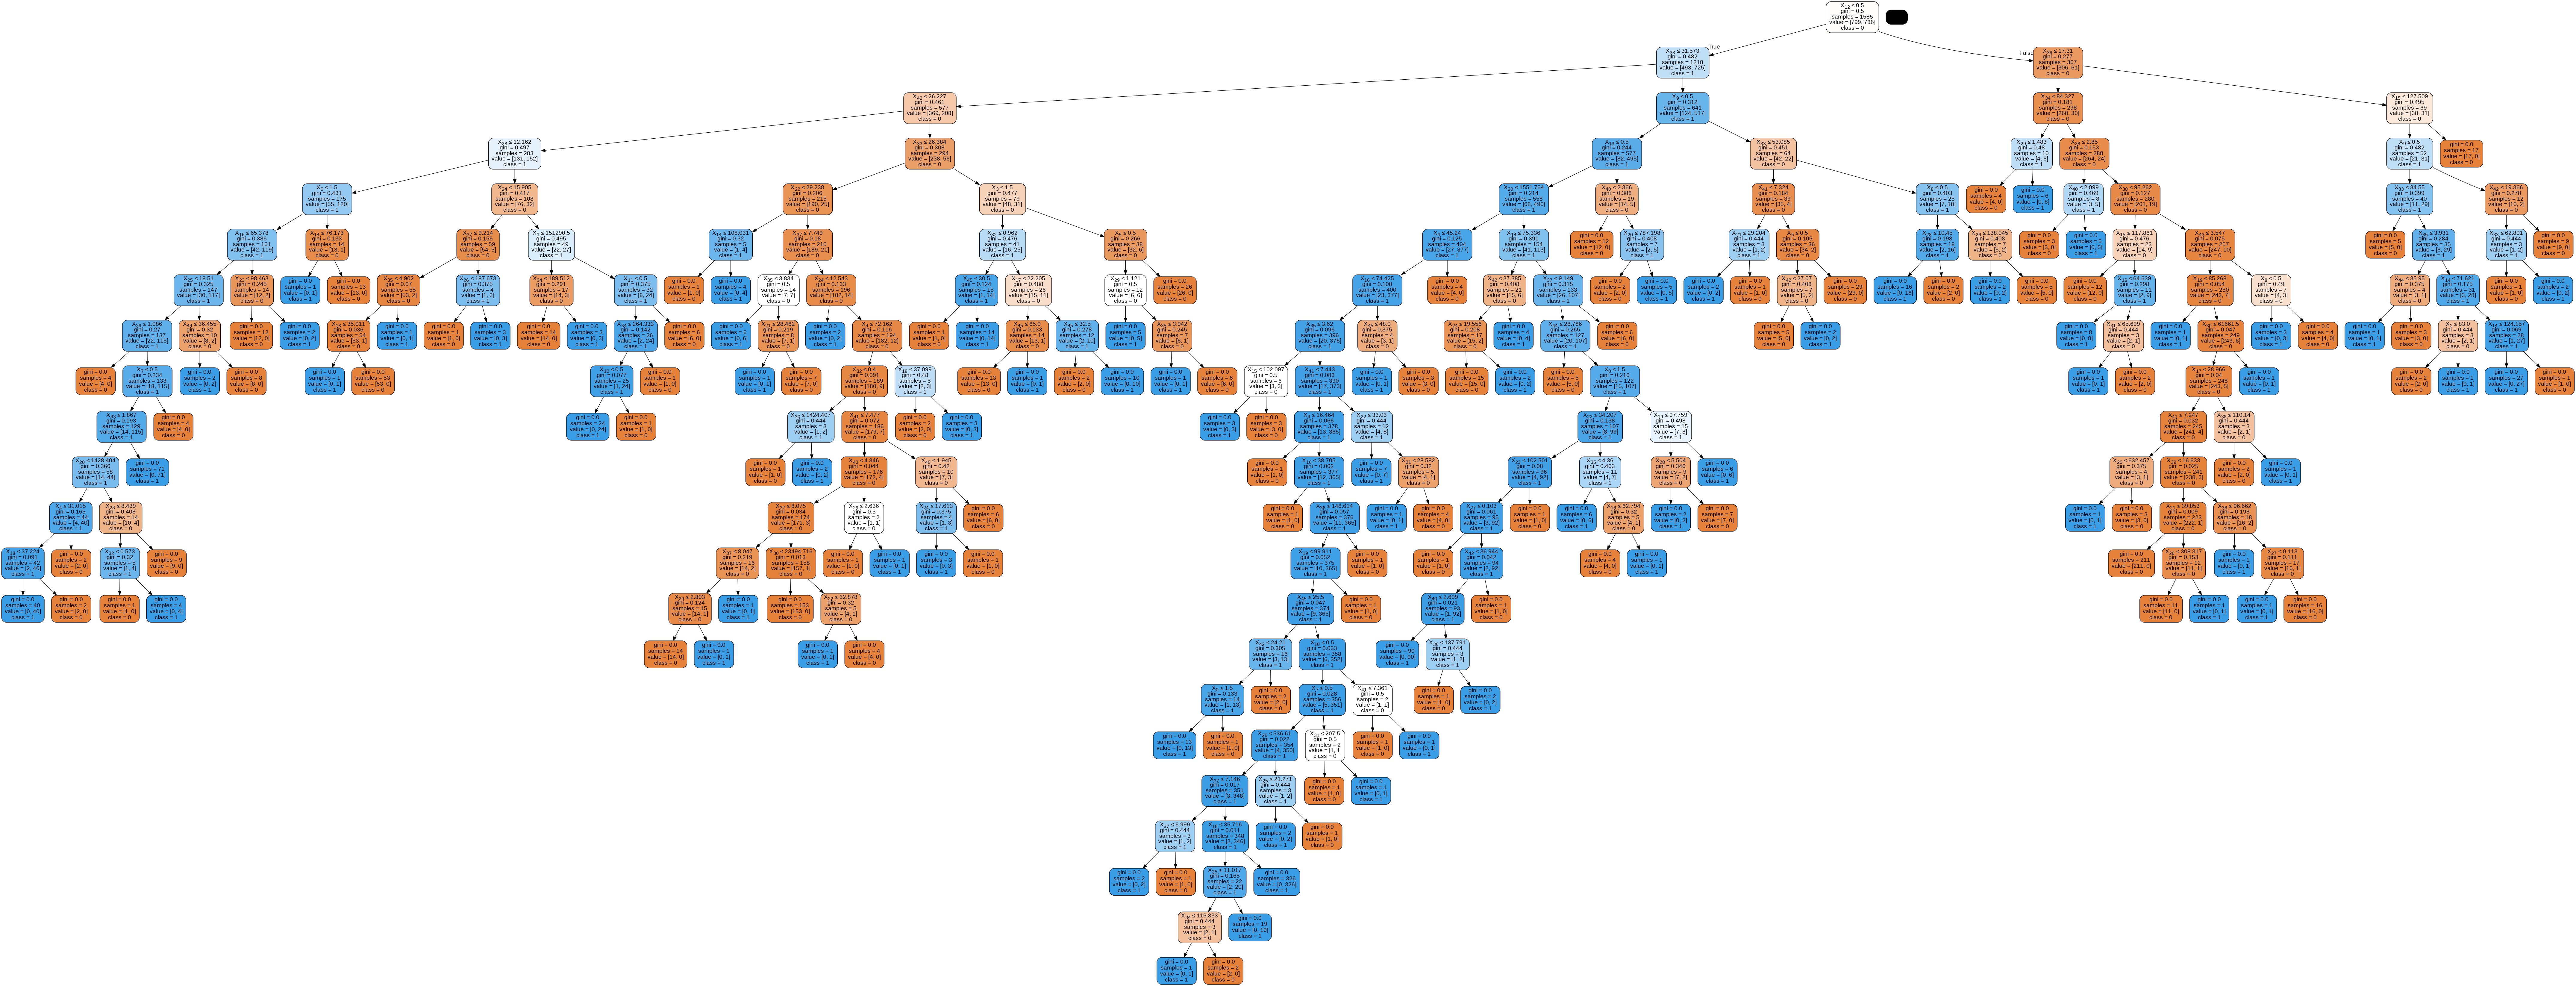

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('grp024DecisionTree.png')
Image(graph.create_png())

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, clf_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.85      0.87       192
         1.0       0.86      0.90      0.88       205

    accuracy                           0.87       397
   macro avg       0.87      0.87      0.87       397
weighted avg       0.87      0.87      0.87       397



Text(91.68, 0.5, 'Predicted')

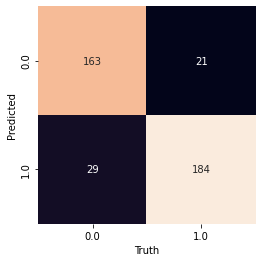

In [ ]:
mat = confusion_matrix(clf_pred, Y_test)
names = np.unique(clf_pred)
seaborn.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')

**Logistc Rregression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LogRegModel = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=2000)
LogRegModel.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(max_iter=2000, multi_class='multinomial')

In [ ]:
log_pred=LogRegModel.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, log_pred))

Accuracy: 0.7783375314861462


**KNN TRY for n=2**

In [ ]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [ ]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=2)

#Train the model using the training sets
knn.fit(X_train, Y_train)

#Predict the response for test dataset
Y_pred = knn.predict(X_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred)) 

Accuracy: 0.7758186397984886


**KNN TRY for n=3**

In [ ]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=3)

#Train the model using the training sets
knn.fit(X_train, Y_train)

#Predict the response for test dataset
Y_pred = knn.predict(X_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
 

Accuracy: 0.7808564231738035


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_pred,Y_test))

              precision    recall  f1-score   support

         0.0       0.67      0.84      0.75       153
         1.0       0.88      0.74      0.81       244

    accuracy                           0.78       397
   macro avg       0.78      0.79      0.78       397
weighted avg       0.80      0.78      0.78       397



Text(91.68, 0.5, 'Predicted')

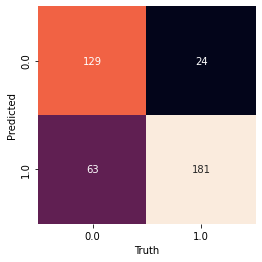

In [ ]:
mat = confusion_matrix(Y_pred, Y_test)
names = np.unique(Y_pred)
seaborn.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')

In [ ]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(X_train, Y_train)

#Predict the response for test dataset
Y_pred = knn.predict(X_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.7556675062972292


Text(91.68, 0.5, 'Predicted')

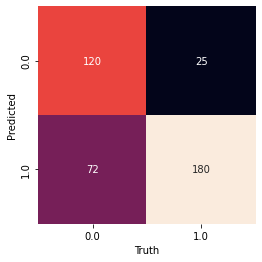

In [ ]:
mat = confusion_matrix(Y_pred, Y_test)
names = np.unique(Y_pred)
seaborn.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
rfc=RandomForestClassifier(n_estimators=700)

#Train the model using the training sets y_pred=clf.predict(X_test)
rfc.fit(X_train,Y_train)

rfc_pred=rfc.predict(X_test)

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_test, rfc_pred))

Accuracy: 0.964735516372796


In [ ]:
estimator = rfc.estimators_[5]
export_graphviz(estimator, out_file='tree.dot', 
                class_names = ['0','1'], proportion = False, 
                precision = 2, filled = True)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])
Image(filename = 'tree.png')

Text(91.68, 0.5, 'Predicted')

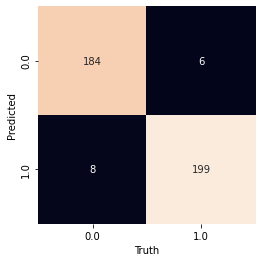

In [ ]:
mat = confusion_matrix(rfc_pred, Y_test)
names = np.unique(rfc_pred)
seaborn.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,rfc_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.96      0.96       192
         1.0       0.96      0.97      0.97       205

    accuracy                           0.96       397
   macro avg       0.96      0.96      0.96       397
weighted avg       0.96      0.96      0.96       397



**XG Boost**

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train, Y_train)
print(xgb)

XGBClassifier()


In [ ]:
xgb_pred = xgb.predict(X_test)
predictions = [round(value) for value in xgb_pred]

In [ ]:
accuracy = accuracy_score(Y_test, predictions)
print(accuracy)

0.9017632241813602


Text(91.68, 0.5, 'Predicted')

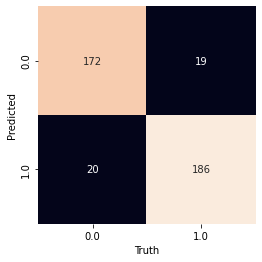

In [ ]:
mat = confusion_matrix(xgb_pred, Y_test)
names = np.unique(xgb_pred)
seaborn.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,xgb_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90       192
         1.0       0.90      0.91      0.91       205

    accuracy                           0.90       397
   macro avg       0.90      0.90      0.90       397
weighted avg       0.90      0.90      0.90       397



**SVM**

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score

In [ ]:
svmPred=svm.SVC(kernel='linear')
svmPred.fit(X_train,Y_train)

SVC(kernel='linear')

In [ ]:
SVMPred=svmPred.predict(X_test)
SVMPred

array([1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1.,
       0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
       0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0.,
       1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1.,
       0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1.,
       1., 0., 1., 0., 0.

In [ ]:
print("Accuracy:",metrics.accuracy_score(Y_test, SVMPred))

Accuracy: 0.7556675062972292


**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
modelnb=GaussianNB()
modelnb.fit(X_train,Y_train)

GaussianNB()

In [ ]:
Y_pred=modelnb.predict(X_test)
Y_pred

array([1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
       0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1.,
       0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0.,
       0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0.,
       1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0.,
       0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       0., 0., 1., 0., 0.

In [ ]:
modelnb.score(X_test,Y_test)

0.760705289672544